In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
from sklearn.metrics import mean_squared_error as mse, r2_score as rsq
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [11]:
ds = pd.read_csv('elnino-80-98.csv')

In [12]:
##Examing the data set
#print(ds)
#print(ds.columns)

<Figure size 1440x720 with 0 Axes>

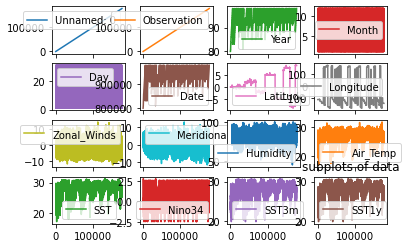

In [13]:
##Checking data set statistics
#print(df.describe().T)
fig = plt.figure(figsize=(20,10))
ds.plot(subplots=True, layout=(4,4))
plt.title("subplots of data")
plt.savefig("subplot.pdf")

Text(0.5, 1.0, 'correlation between data')

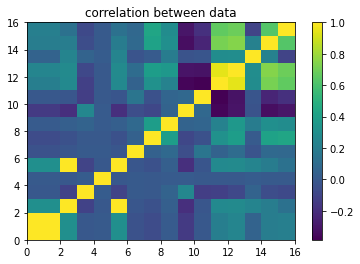

In [15]:
#print(df.corr())
fig1 = plt.figure()
plt.pcolormesh(ds.corr())
cbar = plt.colorbar()
plt.title("correlation between data")

In [16]:
data_in = ds[['Zonal_Winds','Meridional_Winds','Air_Temp','SST']]
data_in = data_in.interpolate()
data_out = ds['SST3m']
data_out= data_out.interpolate()

In [17]:
# split the data into training and testing sets
train_in, test_in, train_out, test_out = train_test_split(data_in, data_out, test_size = 0.25)
# shallow learning model: Random Forest
rf = RandomForestRegressor(n_estimators=30)
rf.fit(train_in,train_out)
Prediction = rf.predict(test_in)
Training = rf.predict(train_in)

RF Training: 0.9, MSE: 0.236 
RF Testing: 0.6, MSE: 1.572 


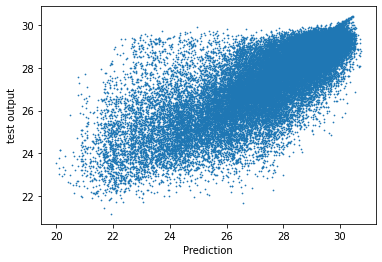

In [18]:
#plot 
plt.scatter(test_out,Prediction,s=0.5)
plt.xlabel('Prediction')
plt.ylabel('test output')
plt.savefig('test_out-prediction',dpi=1000)
#plt.plot(test_in,test_out)
print("RF Training: %3.1f, MSE: %3.3f " %( rsq(train_out, Training), mse(train_out,Training)))
print("RF Testing: %3.1f, MSE: %3.3f " %( rsq(test_out, Prediction), mse(test_out,Prediction) ))

In [19]:
print(np.corrcoef(test_out,Prediction))

[[1.         0.78481294]
 [0.78481294 1.        ]]
